## Matplotlib 3D Bars Example

#### Install the dependencies.

In [1]:
!pip install matplotlib

#### Import the dependencies.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### Define the color map.

To learn more about color maps, see here:

- [https://matplotlib.org/stable/tutorials/colors/colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [3]:
cmap = plt.get_cmap('tab20')
color_range = np.arange(10)*2
light_colors = list(cmap(list(color_range+1)))
colors = list(cmap(list(color_range)))

#### Define the data that will be plotted.

In [4]:
countries = ["Brazil", "USA", "France", "Germany"]
months = ["Apr", "May", "Jun", "Jul"]
temperatures = [
    # Each column is a country, each row is a month.
    [24.6, 11.1, 09.9, 07.0],  # Apr: Brazil, USA, France, Germany
    [23.7, 16.0, 13.6, 11.7],  # May: Brazil, USA, France, Germany
    [22.8, 20.4, 16.9, 15.0],  # Jun: Brazil, USA, France, Germany
    [22.4, 22.9, 19.2, 16.6],  # Jul: Brazil, USA, France, Germany
]

#### Create plot.

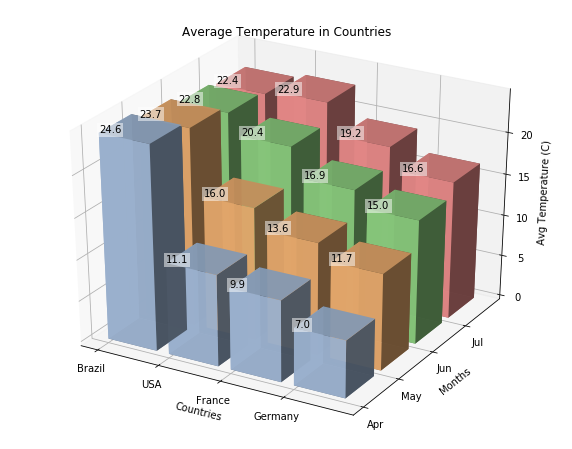

In [5]:
# For textual data we need a numeric representation.
ticks_countries = range(0, len(countries))
ticks_months = range(0, len(months))

_x, _y = np.meshgrid(np.array(ticks_countries), np.array(ticks_months))
x,y = _x.ravel(), _y.ravel()
# Makes a flat list of temperatures
z = [item for sublist in temperatures for item in sublist]
bottom = np.zeros_like(z)

# Define one color for each month, thus we repeat the same color for len(countries)
color3d = ([light_colors[0]]*len(countries))
color3d += ([light_colors[1]]*len(countries))
color3d += ([light_colors[2]]*len(countries))
color3d += ([light_colors[3]]*len(countries))

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
plt.title("Average Temperature in Countries")

# Plotting the bars. https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.bar3d
ax.bar3d(
    x, # Ticks of countries
    y, # Ticks of Months
    bottom, # bottom of the bars, usually an array full of zeroes.
    0.8, # Width (X-axis) of the bars. Can be an array or an scalar.
    0.8, # Depth (Y-axis) of the bars. Can be an array or an scalar.
    z, # Height (Z-axis) of the bars. This is the actual data. Can be an array or an scalar (if all bars have the same height).
    color=color3d,
    shade=True,
    alpha=0.95,
)

# Plotting the text labels for each data point.
for month, i_month in zip(months, ticks_months):
    for country, i_country in zip(countries, ticks_countries):
        temperature = temperatures[i_month][i_country]
        # Parameters are: position in X, position in Y, position in Z, text to plot.
        ax.text(
            i_country,
            i_month,
            temperature,
            temperature,
            color="black",
            ha="left",
            va="baseline",
            bbox={"pad": 2, "alpha": 0.5, "facecolor": "white", "linewidth": 0,},
        )

# Now we set the texts for the numeric representation of textual data.
ax.set_xlabel("Countries")
ax.set_xticks(ticks_countries)
ax.set_xticklabels(countries)

ax.set_ylabel("Months")
ax.set_yticks(ticks_months)
ax.set_yticklabels(months)

ax.set_zlabel("Avg Temperature (C)")

fig.set_size_inches(10, 8)
plt.show()